## Imports

In [19]:
import neural_network as nn
import scipy.io
import numpy as np

%matplotlib inline

## Load and process training samples.

In [20]:
mat_data = scipy.io.loadmat('digits_data/hand_written_digits.mat')
X = mat_data['X']
y = mat_data['y']
augmented_matrix = np.append(X, y, axis=1)
np.random.shuffle(augmented_matrix)
X = augmented_matrix[:, :-1]
y = augmented_matrix[:, -1]

## Setup trainer

In [21]:
# Learning rate
alpha = 0.3
# Regularization
lamb = 100
# Random Theta rang
EPSILON_INIT = 0

digits_nn = nn.NeuralNetwork(X, y, alpha, lamb, EPSILON_INIT, 25)

## Start training

In [22]:
digits_nn.train(iter_limit=0, time_limit=3600 * 10, grad_check=True, info_print_frequency=1000, save_to_file=False)

Started training...
Started gradient checking...
Checking 100 randomly selected thetas...
Gradient check passed.
Used 1.48s for gradient checking.
--------------------------------------------------
Iter: 1, duration: 2.02s, J(θ_train): 7.760901442497709, J(θ_cv): 4.49973220586583, test set accuracy: 13.00%
Iter: 1000, duration: 316.41s, J(θ_train): 2.229813829421997, J(θ_cv): 4.804041657230176, test set accuracy: 85.80%
Iter: 2000, duration: 641.63s, J(θ_train): 2.210998472849528, J(θ_cv): 4.825003742344858, test set accuracy: 86.10%
Iter: 3000, duration: 962.19s, J(θ_train): 2.2087511965433757, J(θ_cv): 4.835058093068544, test set accuracy: 86.20%
Iter: 4000, duration: 1304.99s, J(θ_train): 2.208399040222168, J(θ_cv): 4.8390404528831805, test set accuracy: 86.30%
Iter: 5000, duration: 1626.13s, J(θ_train): 2.2082538134256997, J(θ_cv): 4.840804953794661, test set accuracy: 86.20%
Iter: 6000, duration: 1953.36s, J(θ_train): 2.2071034774780274, J(θ_cv): 4.842383071506003, test set accura

## Print an example of prediction.

In [23]:
num_to_predict = 20
print('Expected:')
for ele in y[-num_to_predict:]:
    print('{0:2}'.format(int(ele)), end=' ')
print()
print('Prediction:')
for ele in digits_nn.predict(np.matrix(X[-num_to_predict:]))[0]:
    print('{0:2}'.format(int(ele)), end=' ')

Expected:
 1  4  3  9  2 10  5 10  9  2  7  9  5  8 10  2  4  2  4  6 
Prediction:
 1  4  3  9  2 10  5 10  9  2  7  3  5  8 10  2  4  2  4  6 

## Plot cost and accuracy graph.

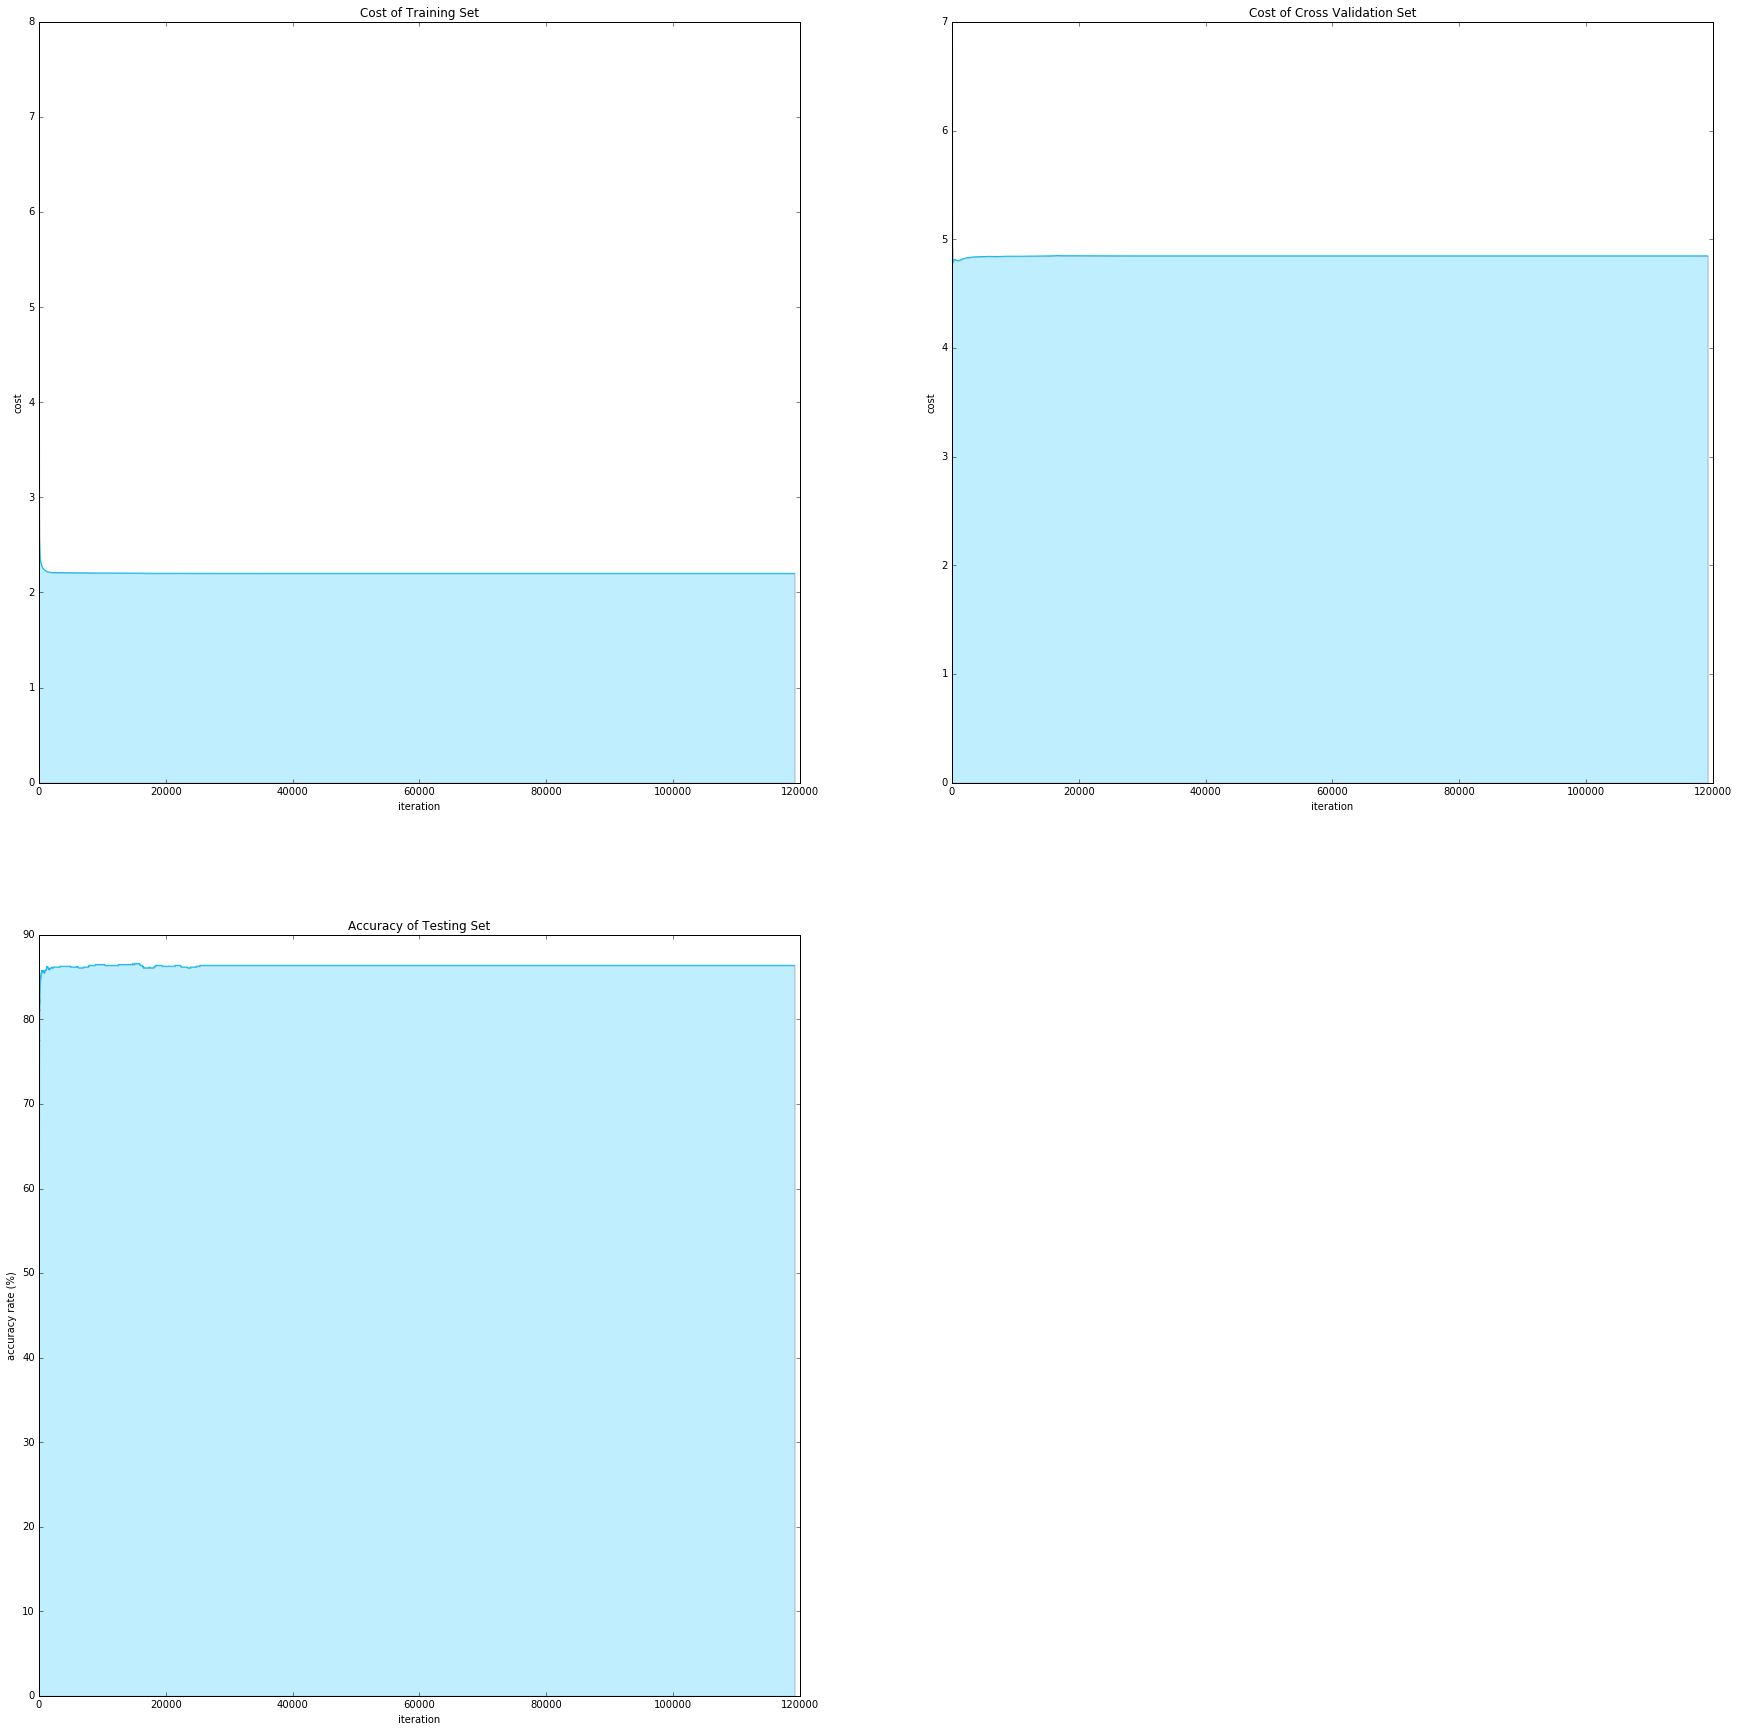

In [24]:
digits_nn.plot_training_info(color='#00BFFF')
digits_nn.show_plot()

## Visualize Theta

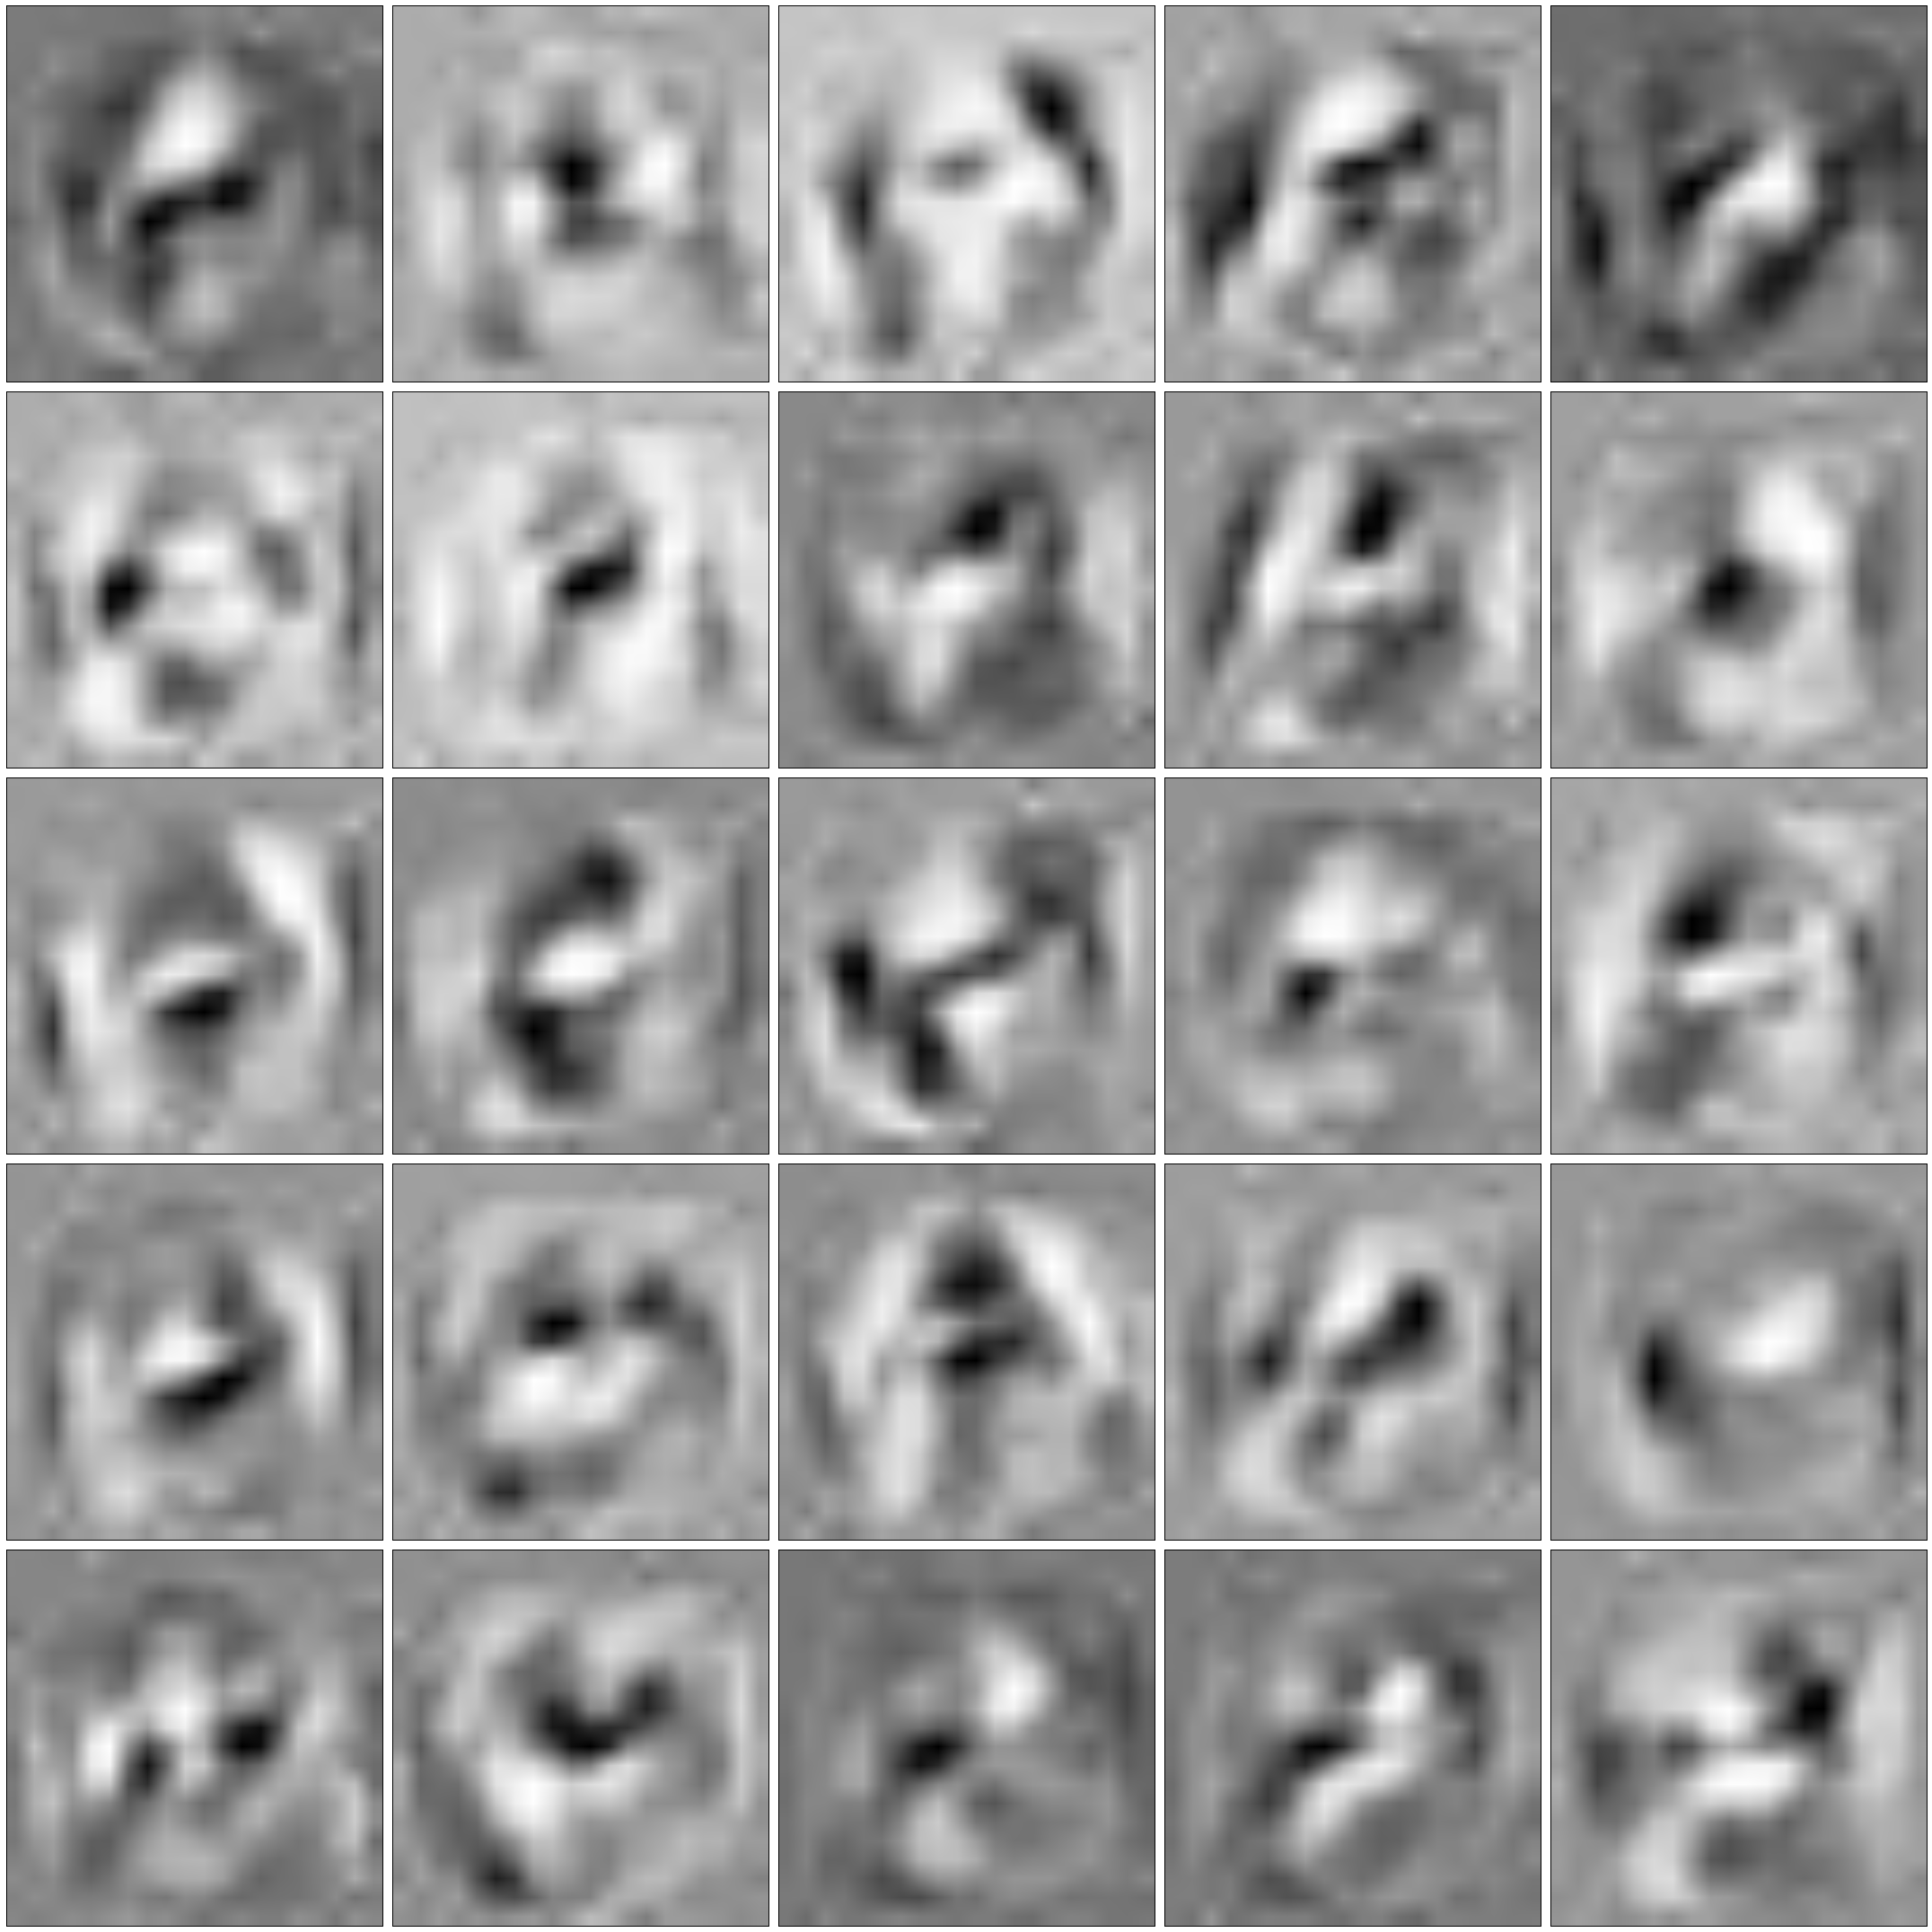

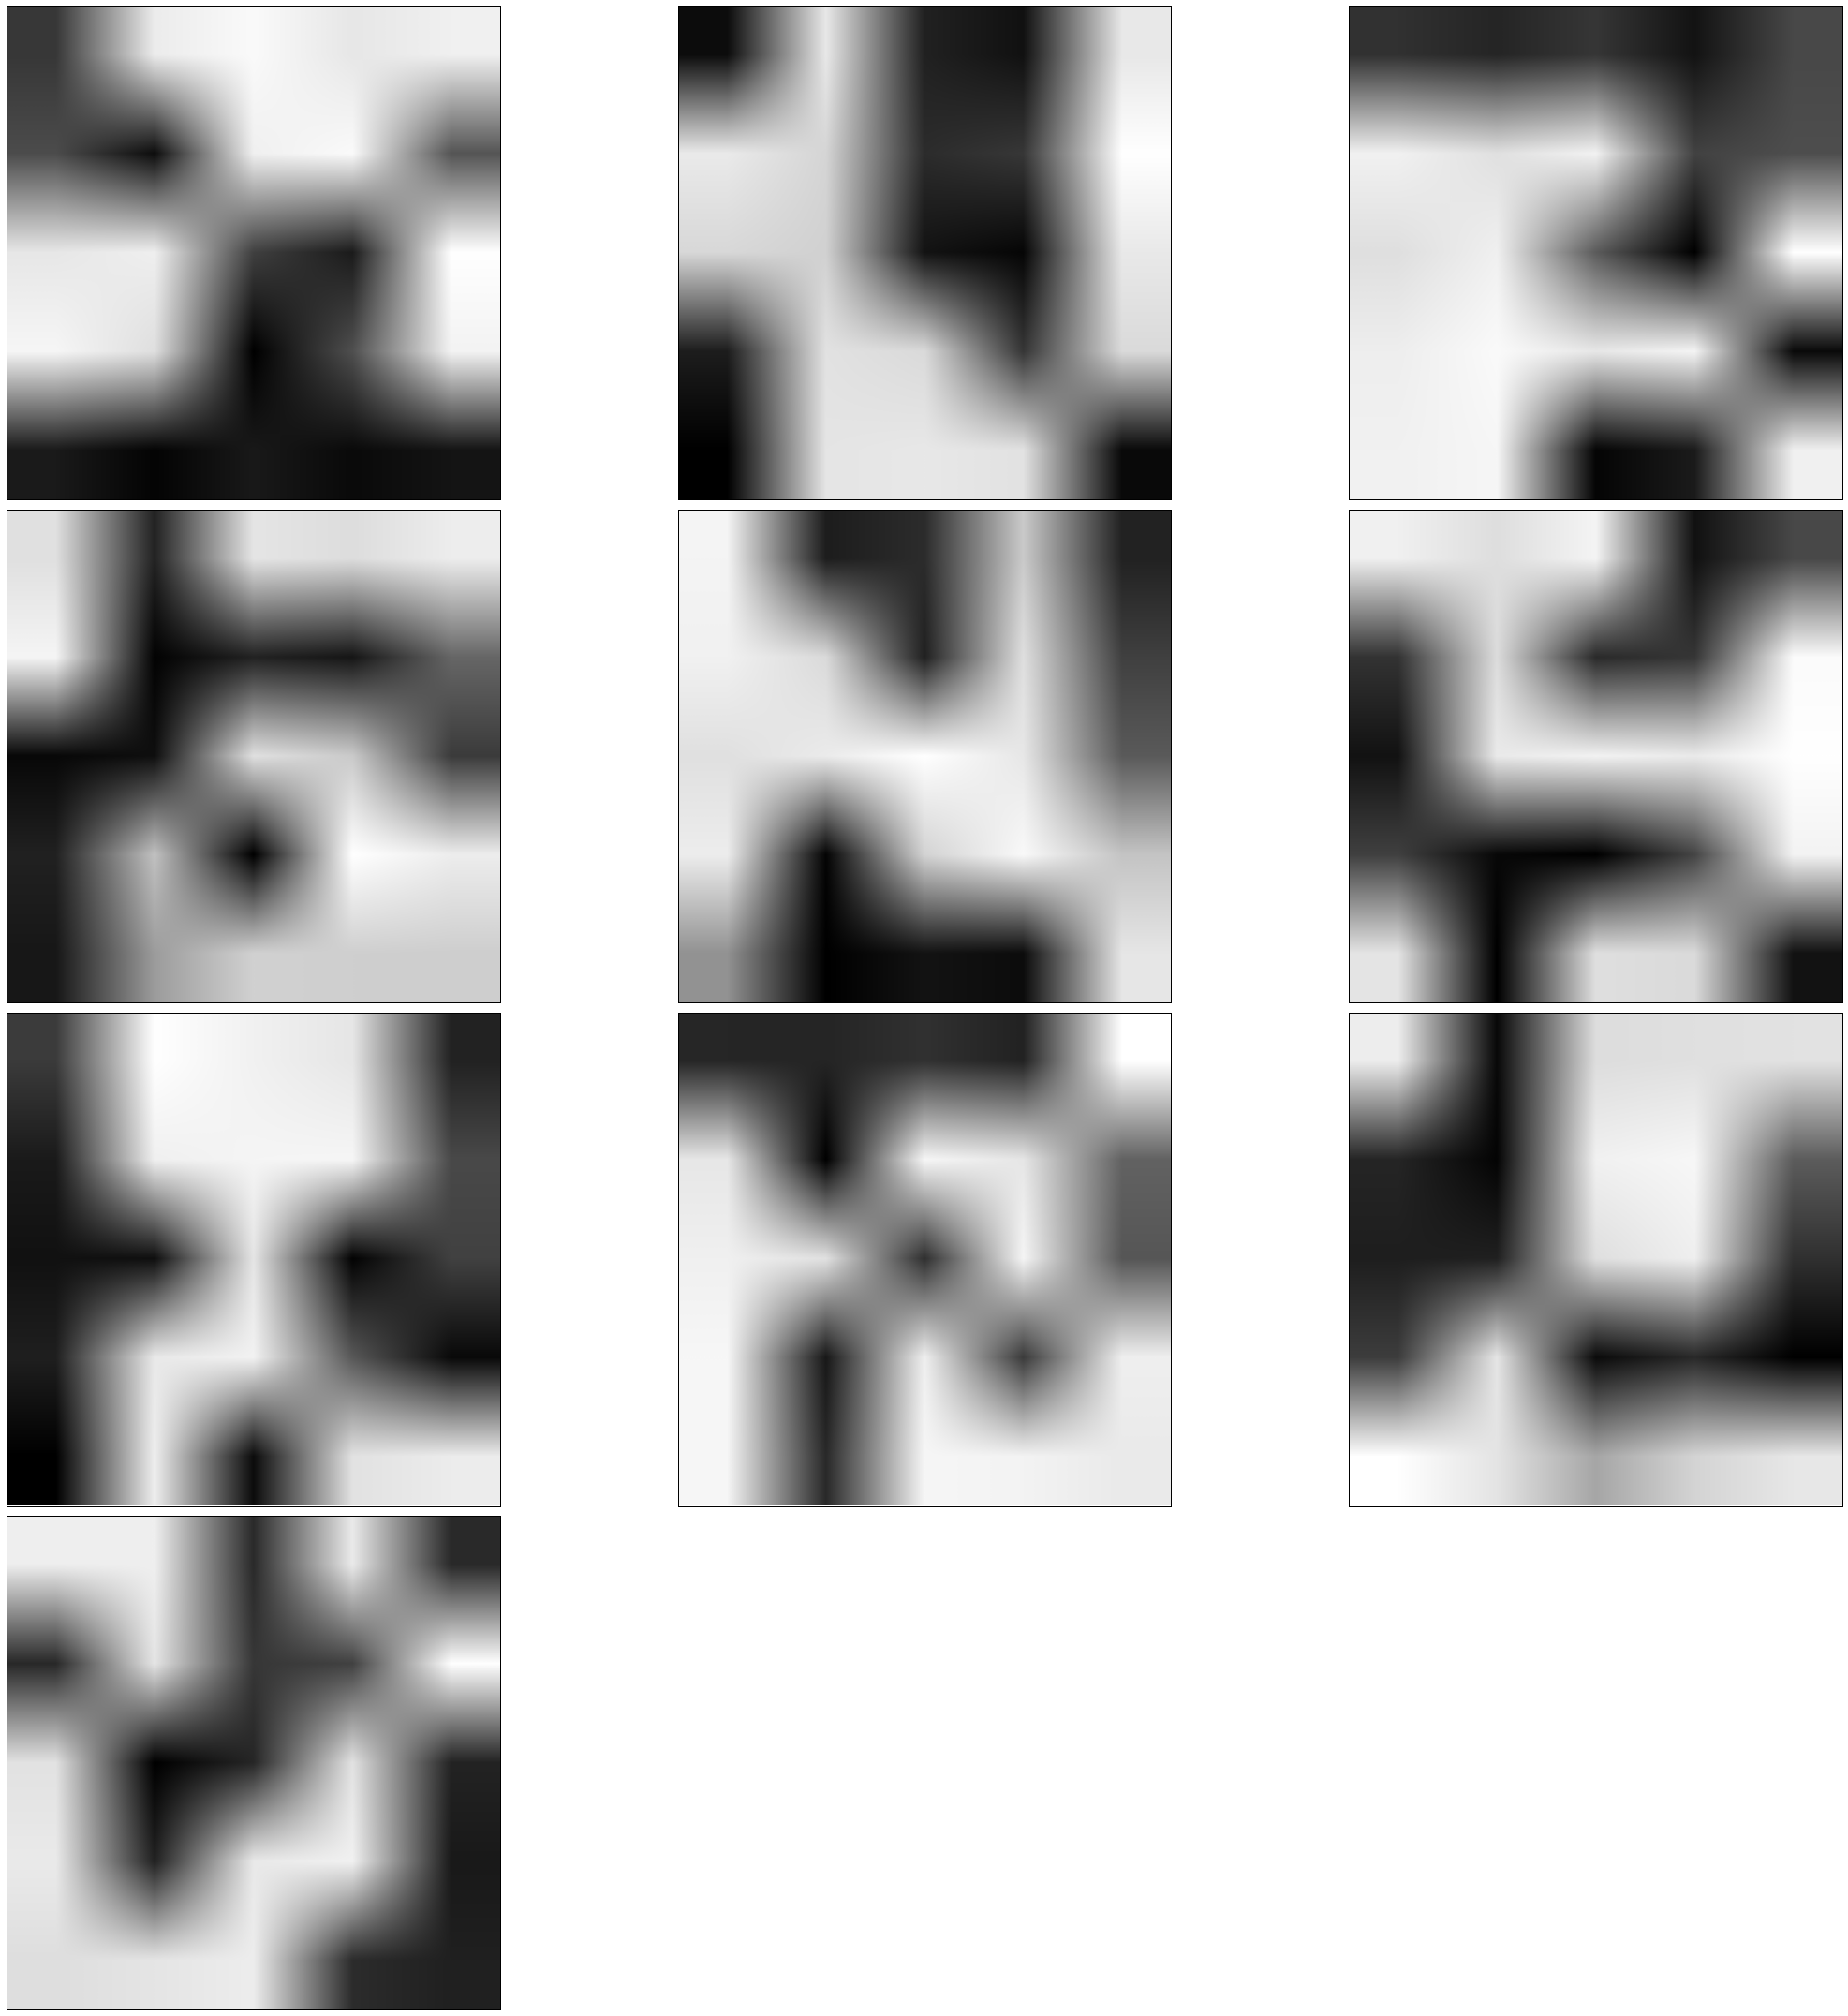

In [25]:
digits_nn.visualize_Theta(cmap='Greys_r')
digits_nn.show_plot()